**Student Alcohol Consumption. Detailed EDA and grade prediction.**

The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students.

The goals of the present work are:
1. Estimate the factors affecting grade of students.
2. Estimate the level of alcohol consumption among students.
3. Build a machine learning model which is able to predict grade of students based on the available features.

The original dataset consists of two parts: students that study math and students that study the Portuguese language. In this notebook we will consider only the first part - students studying math.

Source - https://www.kaggle.com/uciml/student-alcohol-consumption

## First look at the data

First of all, let's import the libraries we will need.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor

Then we can create a dataframe and have a look at it.

In [208]:
df = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')

In [209]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [211]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analysis of linear regression coefficients

If we bring all features to the same scale, we are able to assess feature importance by coefficients (weights) of the linear regression model.

Let's create the matrix of features and the dependent variable vector.

In [254]:
features_imp = df.copy().drop(['G1', 'G2', 'G3'], axis=1)
target_imp = df.copy()['G1']

In [255]:
print(features_imp.shape)
print(target_imp.shape)

(395, 30)
(395,)


Now we can standardize the numerical features.

In [256]:
scaler_num = StandardScaler()
features_imp[['age', 'absences']] = scaler_num.fit_transform(features_imp[['age', 'absences']])

For encoding the categorical features One Hot Encoding technique will be used.

In [257]:
ohe_columns = []
for col in features_imp.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features_imp = pd.get_dummies(features_imp, drop_first=True, columns=ohe_columns)

In [258]:
features_imp.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,1.023046,0.036424,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238380,-0.213796,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.330954,0.536865,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.330954,-0.464016,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.546287,-0.213796,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


The features and the target are prepared. Now we can build the linear regression model.

In [259]:
linear_regressor = LinearRegression()
linear_regressor.fit(features_imp, target_imp)

LinearRegression()

Let's make a dataframe containing the features and their weights.

In [260]:
feature_importances_lr_coef = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                         pd.Series(linear_regressor.coef_, name='weights')],
                                        axis=1)

In [261]:
feature_importances_lr_coef

,features,weights
0,age,-0.050109
1,absences,0.157432
2,school_MS,-0.106426
3,sex_M,0.918640
4,address_U,0.225349
...,...,...
64,Walc_5,0.377821
65,health_2,-0.816278
66,health_3,-1.050511
67,health_4,-0.979161


The sign of weights is not important for us, so we can use the absolute values.

In [262]:
feature_importances_lr_coef['weights'] = abs(feature_importances_lr_coef['weights'])

Let's have a look at the 20 features (including dummy variables, in fact there will be less), that have the strongest influence on the target.

In [263]:
feature_importances_lr_coef = feature_importances_lr_coef.sort_values(by='weights', ascending=False).reset_index(drop=True)

Combining related dummy variables into single features, we can highlight the most important features: 
1. *failures* - number of past class failures.
2. *freetime* - free time after school.
3. *Medu* - mother's education.
4. *studytime* - weekly study time.
5. *schoolsup* - extra educational support.
6. *famrel* - quality of family relationships.
7. *Fjob* - father's job (whether father is teacher or not).
8. *Mjob* - mother's job (whether mother is teacher or not).
9. *traveltime* - home to school travel time.
10. *higher* - wants to take higher education.
11. *health* - current health status.
12. *famsup* - family educational support.

#### Feature importances using Random Forest

This method is based on the attribute available for RandomForestRegressor. The procedure is very simple: fit the RandomForestRegressor and then call the attribute.

We will use the same matrix of features, as well as the dependent variable vector, as we used in the previous section.

Since RandomForestRegressor has a lot of hyperparameters to tune, we have to find the optimum ones. GridSearchCV will be applied.

In [ ]:
parameters = {'max_depth' : [8, 10, 12, 20],
              'n_estimators' : [200, 250, 300],
              'max_features' : [5, 25, 50],
              'min_samples_split' : [2, 4, 6]}
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)
grid_search.fit(features_imp, target_imp)

In [ ]:
grid_search.best_params_

Now we can train the model.

In [265]:
regressor_rf = RandomForestRegressor(max_depth=12, n_estimators=300, max_features=25, min_samples_split=6, random_state=42)
regressor_rf.fit(features_imp, target_imp)

RandomForestRegressor(max_depth=12, max_features=25, min_samples_split=6,
                      n_estimators=300, random_state=42)

Let's make a dataframe containing the features and their importnaces.

In [266]:
feature_importances_rf = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                    pd.Series(regressor_rf.feature_importances_, name='importance')],
                                    axis=1).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [267]:
feature_importances_rf

,features,importance
0,absences,0.060971
1,schoolsup_yes,0.049489
2,failures_3,0.047631
3,age,0.032128
4,Medu_4,0.032069
...,...,...
64,Walc_5,0.006013
65,Fjob_health,0.002838
66,Dalc_5,0.001971
67,Dalc_4,0.001679


As in the previous section, let's have a look at the 20 features and by combining dummy variables into single features the most important features will be highlighted.

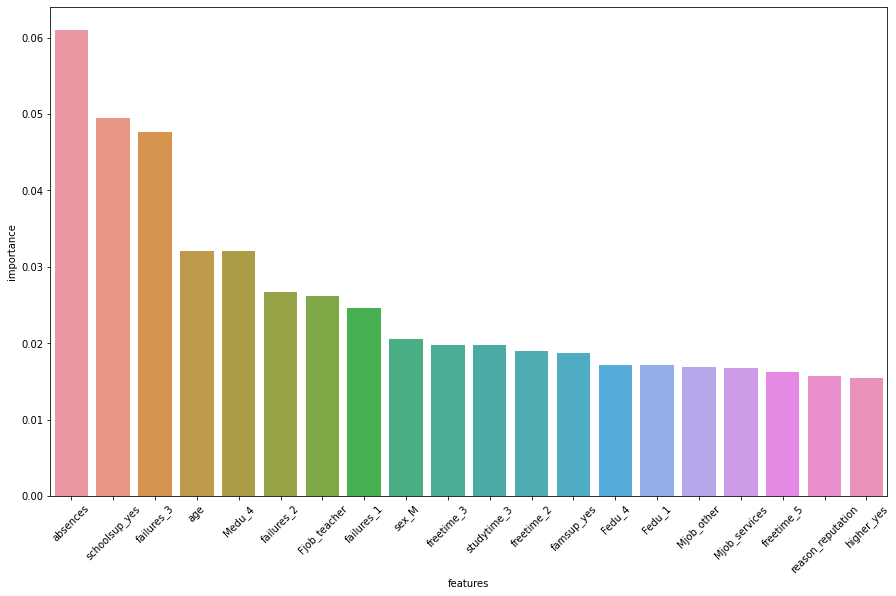

In [268]:
plt.figure(figsize=(15,9))
sns.barplot(data=feature_importances_rf[:20], x='features', y='importance')
plt.xticks(rotation=45)
plt.show()

The most important features based on the Random Forest:
1. *absences* - number of school absences.
2. *schoolsup* - extra educational support.
3. *failures* - number of past class failures.
4. *age*.
5. *Medu* - mother's education.
6. *Fjob* - father's job (whether father is teacher or not).
7. *sex*.
8. *freetime* - free time after school.
9. *studytime* - weekly study time.
10. *famsup* - family educational support.
11. *Fedu* - father's education.
12. *Mjob* - mother's job.
13. *reason* - reason to choose this school.
14. *higher* - wants to take higher education.

#### Conclusions

In this paragraph, feature importances were defined using different approaches. The following conclusions were obtained:
1. Correlation analysis is not applicable because the majority of features are categorical.
2. Based on the analysis of linear regression coefficients the top-5 features that have the most influence on the target are the following: *failures*, *freetime*, *Medu*, *studytime*, *schoolsup*.
3. Based on Random Forest the top-5 features that have the most influence on the target are the following: *absences*, *schoolsup*, *failures*, *age*, *Medu*.
4. Both algorithms agree regarding *failures*, *freetime*, *Medu* and *schoolsup*, but there are some contradictions: while Random Forest considers *age*, *absences* and *sex* important features, weights of these features in Linear Regression are small. It should be clarified in the next step. Important features from both algorithms should be investigated in detail.

## Data preprocessing

In this paragraph, we will prepare our data for building a machine learning model. 

As we said in section 2.1.1 all grades (G1, G2, G3) have a very strong linear correlation, and on the EDA stage, we considered only G1. We will continue considering only G1 on the modeling stage as well. 

### Matrix of features and dependent variable vector

We have 30 features, all columns except index and grades. Our target is G1.

In [286]:
features = df.copy().drop(['G1', 'G2', 'G3'], axis=1)
target = df.copy()['G1']

Let's check ourselves.

In [287]:
print(features.shape)
print(target.shape)

(395, 30)
(395,)


In [288]:
features.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


Everything is correct.

### Encoding categorical data

To encode categorical data we will use one hot encoding (OHE).

In [289]:
ohe_columns = []
for col in features.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
        
features = pd.get_dummies(features, drop_first=True, columns=ohe_columns)

In [290]:
features.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,4,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,10,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,4,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


OHE was carried out successfully.

### Train-test split

To estimate the model performance in the future we have to create a test set. In our case, it will contain 20% of all data.

In [291]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=5)

Let's check.

In [292]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(316, 69)
(79, 69)
(316,)
(79,)


Ok, it looks fine.

It's important that the test and train set has a similar distribution of the target value. Let's check this. If this condition is not met, random seed in train_test_split should be changed.

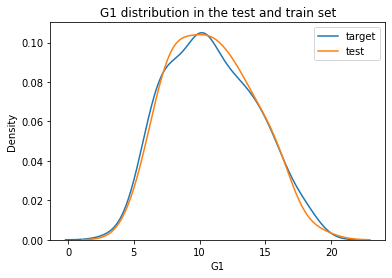

In [293]:
sns.kdeplot(target_train, label='target')
sns.kdeplot(target_test, label='test')
plt.legend()
plt.title('G1 distribution in the test and train set')
plt.show()

In [294]:
print('train mean value:', target_train.mean())
print('test mean value:', target_test.mean())

train mean value: 10.905063291139241
test mean value: 10.924050632911392


The distributions look similar. We can conclude that the split was carried out successfully. 

### Feature scaling

2 numerical features should be standardized.

In [295]:
scaler = StandardScaler()
features_train[['age', 'absences']] = scaler.fit_transform(features_train[['age', 'absences']])
features_test[['age', 'absences']] = scaler.transform(features_test[['age', 'absences']])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [296]:
features_train.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
48,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
247,4.232726,1.225475,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
42,-1.294304,-0.481547,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,-0.504729,1.713196,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
127,1.863998,-0.481547,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [297]:
features_test.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
306,2.653574,-0.725407,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
343,0.284847,-0.725407,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
117,-0.504729,-0.725407,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50,-0.504729,-0.481547,0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
316,1.074423,-0.725407,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


Standardization was carried out successfully.

### Feature engineering

I do not think, that it's a good idea to make new features in our dataset because the features here are quite clear. So feature engineering in this notebook will imply dropping features that have no influence on the target (these features are garbage for the model).

The procedure will be the following:
1. Define the feature importance as we did in section 2.2.2, but only using the train set.
2. Set a threshold for feature importance, unimportant features are deleted.
3. Build a simple model (we will use KNN) and assess its performance via cross validation.
4. Repeat steps 2 and 3 to find the best model.

Let's build a model and find feature importances.

In [298]:
regressor_lr = LinearRegression()
regressor_lr.fit(features_train, target_train)

LinearRegression()

In [299]:
feature_importances = pd.concat([pd.Series(features_train.columns, name='features'), 
                                 pd.Series(regressor_lr.coef_, name='importance')],
                                axis=1)

feature_importances['importance'] = abs(feature_importances['importance'])

feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [300]:
feature_importances.head()

,features,importance
0,failures_3,4.125497
1,famrel_2,3.695198
2,freetime_5,3.061721
3,Medu_2,2.570433
4,Medu_3,2.561818


Now we can make a loop to evaluate different thresholds of importance.

In [323]:
results_features = pd.DataFrame({'threshold' : [], 
                    'number_of_features' : [],
                    'mse' : []})

for threshold in np.arange(0, 4, 0.05):
    features_truncated = features_train.copy()

    for col in features_truncated.columns:
        if feature_importances.loc[feature_importances['features'] == col]['importance'].values < threshold:
            features_truncated = features_truncated.drop(col, axis=1)

    y_pred = cross_val_predict(KNeighborsRegressor(n_neighbors=6), features_truncated, target_train, cv=5)
    mse = mean_squared_error(target_train, y_pred)
    if results_features.empty or results_features['number_of_features'].iloc[-1] > features_truncated.shape[1]:
        results_features = results_features.append(pd
                                                   .DataFrame([[threshold, 
                                                                features_truncated.shape[1], 
                                                                mse]], 
                                                              columns=results_features.columns))

In [324]:
results_features.sort_values(by='mse').head()

,threshold,number_of_features,mse
0,0.90,32.0,10.489715
0,0.85,33.0,10.682314
0,0.55,38.0,10.755890
0,0.25,47.0,10.764416
0,0.70,34.0,10.937060


The best mean_squared_error was achieved by using a threshold of 0.9 with 32 features. Let's drop unnecessary features.

In [327]:
features_train_truncated = features_train.copy()

for col in features_train_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.9:
        features_train_truncated = features_train_truncated.drop(col, axis=1)

In [328]:
features_train_truncated.head()

,sex_M,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
48,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
247,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
42,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
237,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
127,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


And the same for the test set.

In [329]:
features_test_truncated = features_test.copy()

for col in features_test_truncated.columns:
    if feature_importances.loc[feature_importances['features'] == col]['importance'].values < 0.9:
        features_test_truncated = features_test_truncated.drop(col, axis=1)

In [330]:
features_test_truncated.head()

,sex_M,famsize_LE3,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_other,Fjob_services,Fjob_teacher,...,famrel_5,freetime_2,freetime_5,goout_4,Dalc_4,Dalc_5,health_2,health_3,health_4,health_5
306,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
343,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
50,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
316,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Modeling

The main goal of this part is to build a model that will be able to predict students grade.

It will be done in 3 steps:
1. Training the model.
2. Evaluating the model performance on the test set.
3. Сhecking the model for adequacy (comparison with a constant model).

### Training the model

For training, we will be using XGBRegressor from xgboost library. The choice is based on the fact that usually gradient boosting shows the best results on table data.

GridSearchCV will be used for tuning the hyperparameters of the model.

In [331]:
parameters = {'max_depth' : [2, 3, 4],
              'n_estimators' : [20, 30, 50, 75, 100],
              'eta' : [0.5, 0.3, 0.1, 0.05]}
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               verbose=1)

grid_search_xgb.fit(features_train_truncated, target_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   48.8s finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [332]:
grid_search_xgb.best_params_

{'eta': 0.5, 'max_depth': 2, 'n_estimators': 20}

In [333]:
grid_search_xgb.best_score_

-8.925028194937594

The optimal hyperparameters were defined. Now we can train the model.

In [334]:
regressor = XGBRegressor(max_depth=2, 
                         n_estimators=20,
                         eta=0.5,
                         random_state=42)
regressor.fit(features_train_truncated, target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating the model performance on the test set

For evaluating RMSE (root mean squared error) will be used.

In [335]:
target_pred = regressor.predict(features_test_truncated)

In [336]:
mean_squared_error(target_test, target_pred) ** 0.5

3.1955217027350007

In [337]:
mean_squared_error(target_train,  regressor.predict(features_train_truncated)) ** 0.5

2.439668739170064

The performance on the test set is a bit worse than on the training set, but it's appropriate. We can conclude, that overfitting hasn't happened.

Let's have a look at the learning curve.

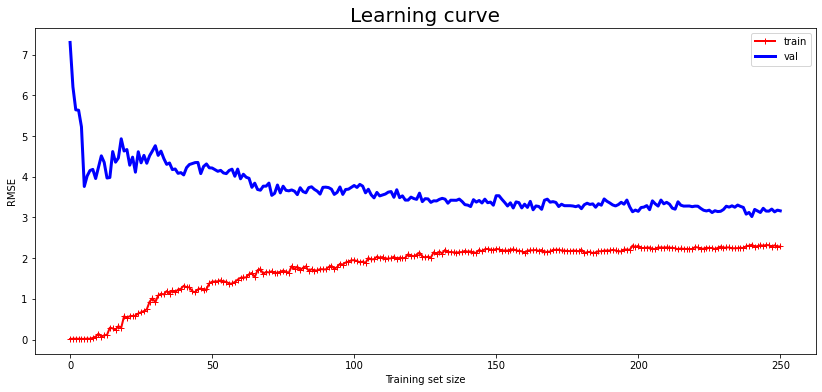

In [338]:
X_train, X_val, y_train, y_val = train_test_split(features_train_truncated, target_train, test_size = 0.2, random_state=100500)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    regressor.fit(X_train[:m], y_train[:m])
    y_train_predict = regressor.predict(X_train[:m])
    y_val_predict = regressor.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.figure(figsize=(14,6))
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning curve', fontsize = 20)
plt.show()

Ideally, we should have the same RMSE on the training and on the validation sets. The curves tend to converge, but there are not enough data. If the dataset was larger the predictions would be more precise.

### Model adequacy

A model can be recognized as adequate or meaningful if its performance is better than the performance of a constant model (which output is always the same (for example, mean or median value)). For comparison we will be using RMSE. Our model has RMSE of 3.24 on the test.

Let's check the model, that always predict the mean value.

In [339]:
regressor_mean = DummyRegressor(strategy='mean')
regressor_mean.fit(features_train_truncated, target_train)

DummyRegressor()

In [340]:
mean_squared_error(target_test, regressor_mean.predict(features_test_truncated)) ** 0.5

3.129226832177046

**The performance of the constant model is a bit better. Well, we have to admit that we did not manage to get a reasonable model for grade prediction.**